In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
data1 = loadmat('data1.mat')

In [2]:
F = data1['F_data']
X = data1['X_data']

In [3]:
F1 = F[:,:,1]
X1 = X[:,:,1]

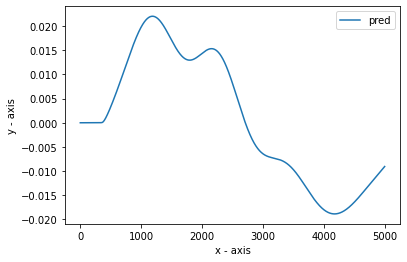

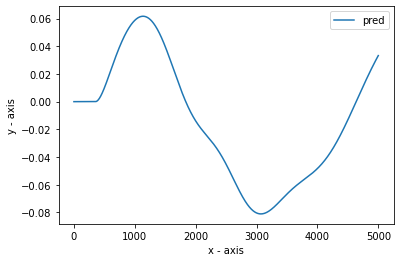

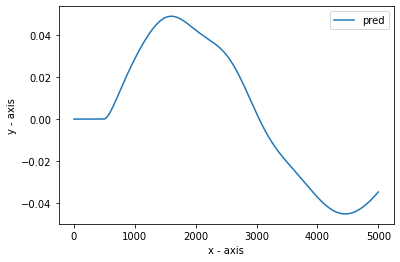

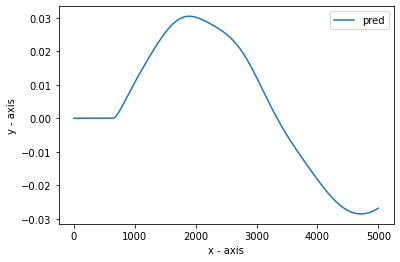

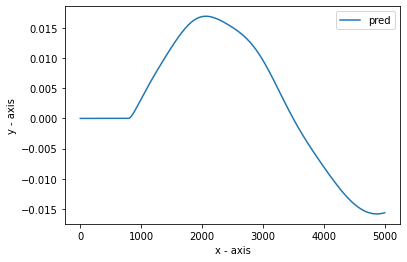

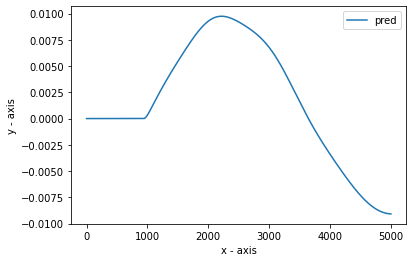

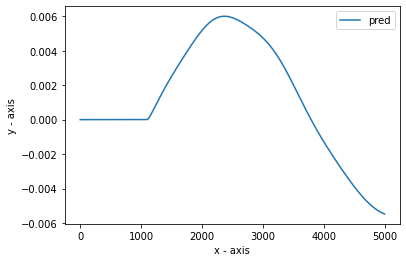

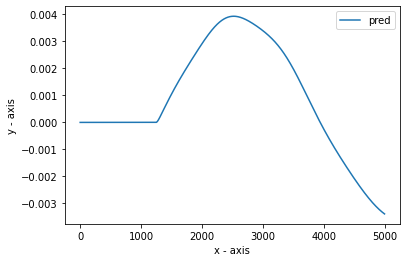

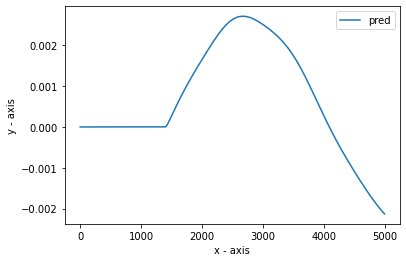

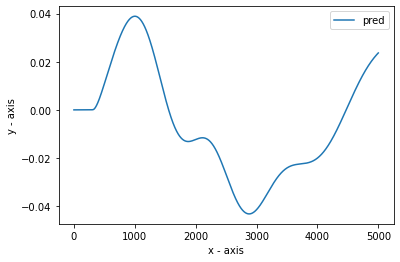

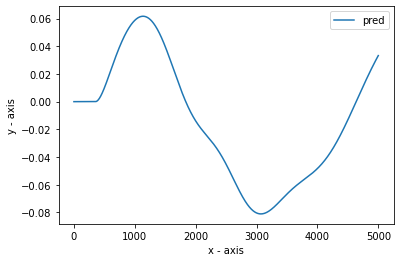

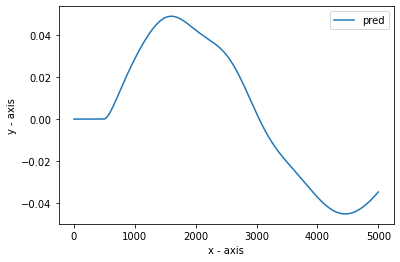

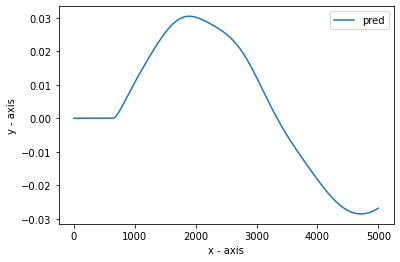

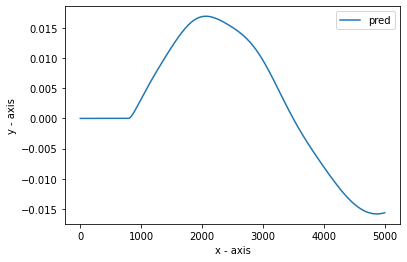

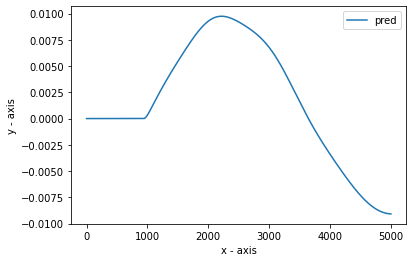

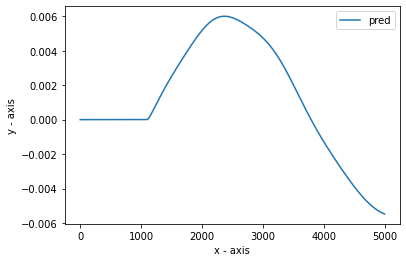

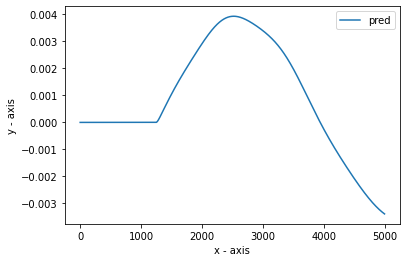

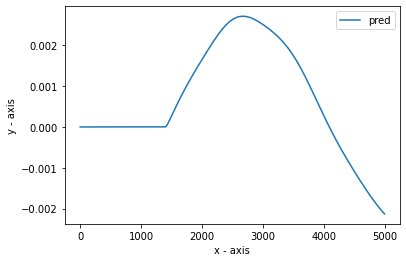

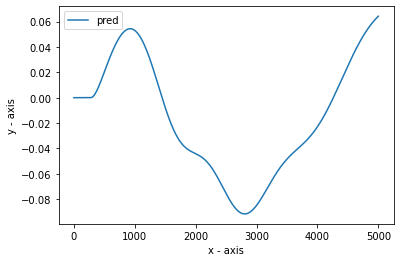

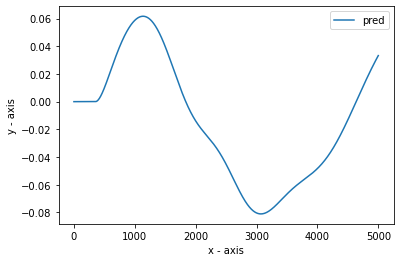

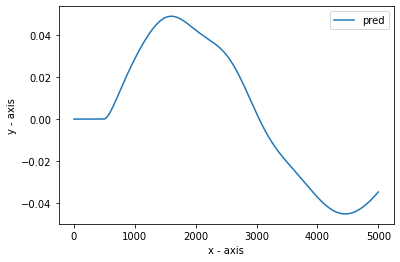

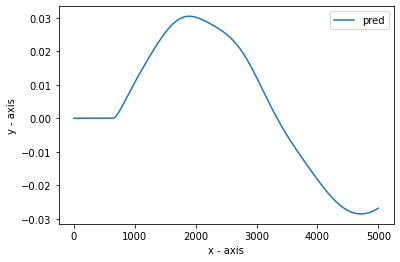

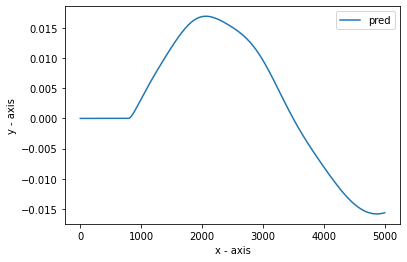

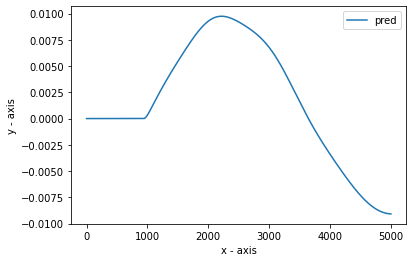

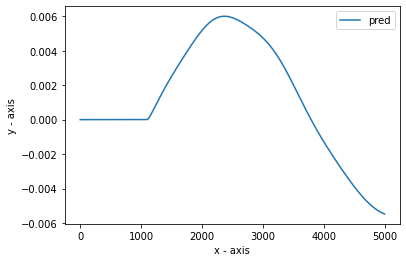

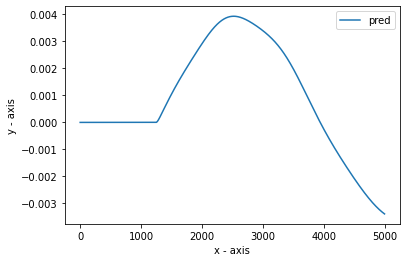

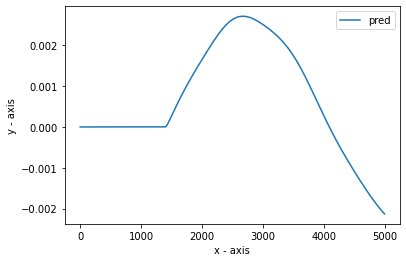

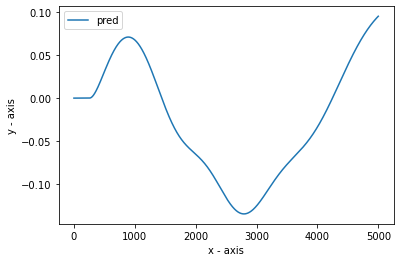

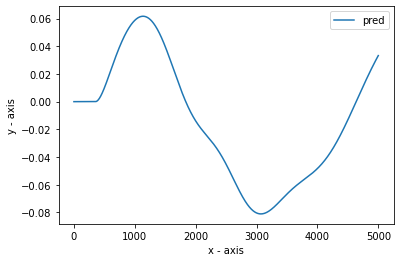

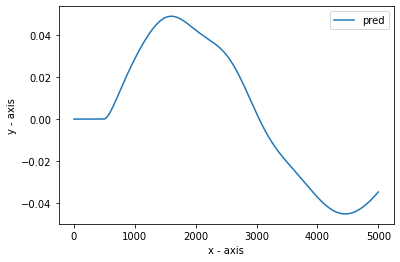

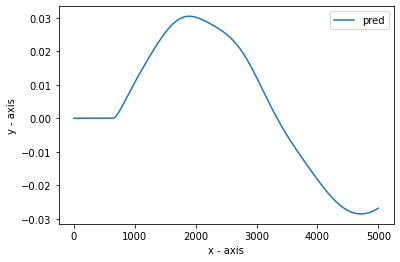

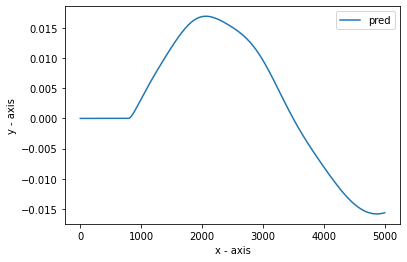

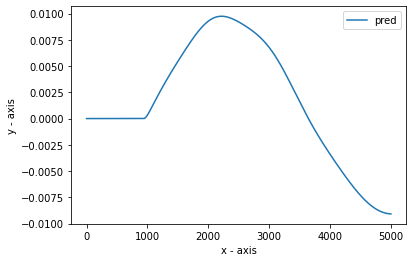

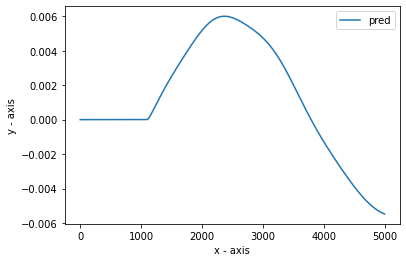

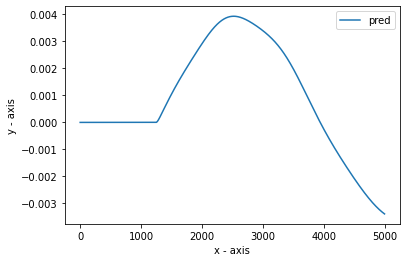

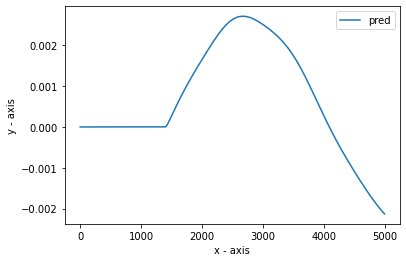

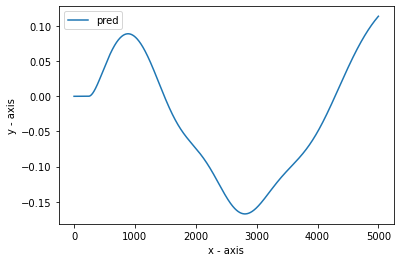

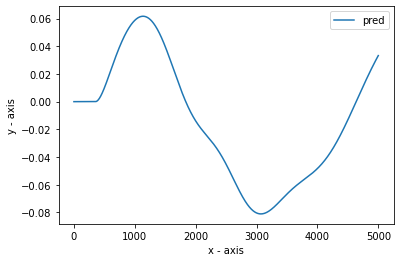

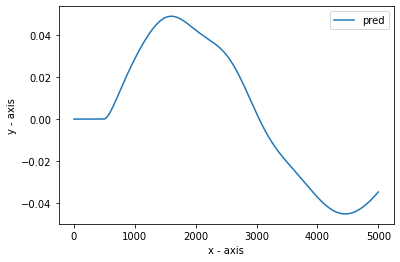

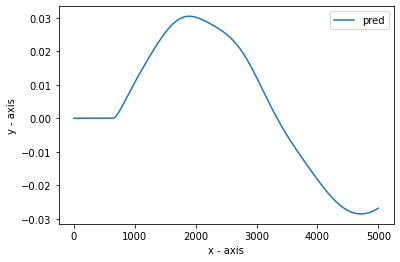

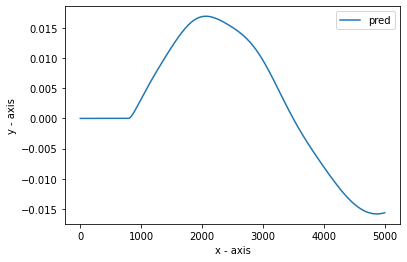

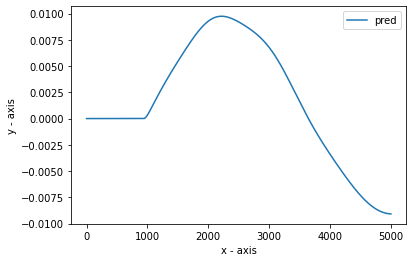

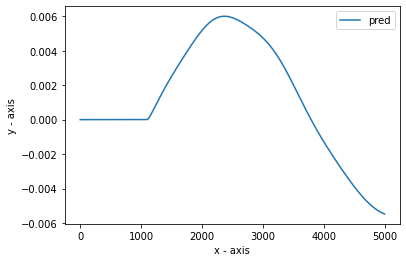

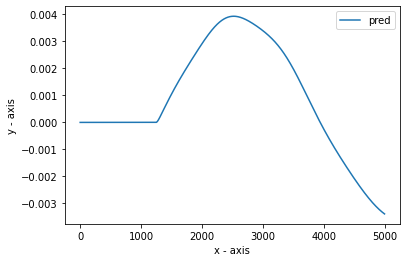

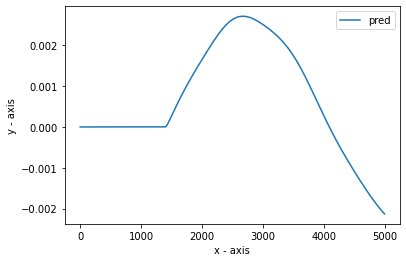

In [4]:
for i in range(len(X1)):
    plt.plot(X1[i], label = "pred")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

In [5]:
X = X.reshape(-1,1)
F = F.reshape(-1,1)
from sklearn.preprocessing import  MinMaxScaler
scaler_F = MinMaxScaler(feature_range=(-1, 1))
scaler_X = MinMaxScaler(feature_range=(-1, 1))
X = scaler_X.fit_transform(X)
F = scaler_F.fit_transform(F)

In [6]:
X = X.reshape(-1,5001,5)
F = F.reshape(-1,5001,5)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(F,X , test_size=0.3, random_state=42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN,LSTM,Activation,GRU,Flatten,Dropout,Conv1D,Conv2D,RepeatVector,TimeDistributed
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=1000, verbose=2, mode='auto', restore_best_weights=True)

# 创建RNN模型
model = Sequential()
model.add(TimeDistributed(Dense(128), input_shape=(5001, 5)))
model.add(Dense(units=1024))
model.add(Dense(units=1024))
model.add(Dense(units=5))

# 编译模型
model.compile(loss='mse', optimizer='adam', metrics = ['mae'])

# 进行预测
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 5001, 128)         768       
_________________________________________________________________
dense_1 (Dense)              (None, 5001, 1024)        132096    
_________________________________________________________________
dense_2 (Dense)              (None, 5001, 1024)        1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 5001, 5)           5125      
Total params: 1,187,589
Trainable params: 1,187,589
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train,epochs=20000, validation_split=0.3,verbose=1,callbacks = earlyStop)

Epoch 1/20000
1/1 [==============================] - 2s 2s/step - loss: 0.0594 - mae: 0.2184 - val_loss: 2.6407 - val_mae: 1.5426
Epoch 2/20000
1/1 [==============================] - 0s 195ms/step - loss: 2.5458 - mae: 1.5188 - val_loss: 0.2237 - val_mae: 0.4152
Epoch 3/20000
1/1 [==============================] - 0s 197ms/step - loss: 0.1830 - mae: 0.3890 - val_loss: 0.2772 - val_mae: 0.4767
Epoch 4/20000
1/1 [==============================] - 0s 197ms/step - loss: 0.2709 - mae: 0.4817 - val_loss: 0.6292 - val_mae: 0.7365
Epoch 5/20000
1/1 [==============================] - 0s 197ms/step - loss: 0.6333 - mae: 0.7522 - val_loss: 0.4331 - val_mae: 0.6102
Epoch 6/20000
1/1 [==============================] - 0s 197ms/step - loss: 0.4331 - mae: 0.6240 - val_loss: 0.1319 - val_mae: 0.3245
Epoch 7/20000
1/1 [==============================] - 0s 199ms/step - loss: 0.1207 - mae: 0.3237 - val_loss: 0.0468 - val_mae: 0.1436
Epoch 8/20000
1/1 [==============================] - 0s 200ms/step - los

1/1 [==============================] - 0s 198ms/step - loss: 0.0169 - mae: 0.0825 - val_loss: 0.0400 - val_mae: 0.1274
Epoch 63/20000
1/1 [==============================] - 0s 197ms/step - loss: 0.0168 - mae: 0.0801 - val_loss: 0.0401 - val_mae: 0.1256
Epoch 64/20000
1/1 [==============================] - 0s 198ms/step - loss: 0.0166 - mae: 0.0775 - val_loss: 0.0402 - val_mae: 0.1238
Epoch 65/20000
1/1 [==============================] - 0s 198ms/step - loss: 0.0165 - mae: 0.0751 - val_loss: 0.0404 - val_mae: 0.1224
Epoch 66/20000
1/1 [==============================] - 0s 198ms/step - loss: 0.0165 - mae: 0.0730 - val_loss: 0.0407 - val_mae: 0.1217
Epoch 67/20000
1/1 [==============================] - 0s 199ms/step - loss: 0.0165 - mae: 0.0719 - val_loss: 0.0409 - val_mae: 0.1219
Epoch 68/20000
1/1 [==============================] - 0s 198ms/step - loss: 0.0166 - mae: 0.0718 - val_loss: 0.0411 - val_mae: 0.1224
Epoch 69/20000
1/1 [==============================] - 0s 199ms/step - loss: 0

1/1 [==============================] - 0s 200ms/step - loss: 0.0164 - mae: 0.0736 - val_loss: 0.0403 - val_mae: 0.1226
Epoch 124/20000
1/1 [==============================] - 0s 202ms/step - loss: 0.0164 - mae: 0.0736 - val_loss: 0.0403 - val_mae: 0.1226
Epoch 125/20000
1/1 [==============================] - 0s 201ms/step - loss: 0.0164 - mae: 0.0735 - val_loss: 0.0403 - val_mae: 0.1226
Epoch 126/20000
1/1 [==============================] - 0s 200ms/step - loss: 0.0164 - mae: 0.0735 - val_loss: 0.0403 - val_mae: 0.1225
Epoch 127/20000
1/1 [==============================] - 0s 201ms/step - loss: 0.0164 - mae: 0.0734 - val_loss: 0.0403 - val_mae: 0.1224
Epoch 128/20000
1/1 [==============================] - 0s 201ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0403 - val_mae: 0.1224
Epoch 129/20000
1/1 [==============================] - 0s 201ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0403 - val_mae: 0.1223
Epoch 130/20000
1/1 [==============================] - 0s 201ms/step - 

Epoch 184/20000
1/1 [==============================] - 0s 202ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 185/20000
1/1 [==============================] - 0s 204ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 186/20000
1/1 [==============================] - 0s 203ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 187/20000
1/1 [==============================] - 0s 202ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 188/20000
1/1 [==============================] - 0s 203ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 189/20000
1/1 [==============================] - 0s 201ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 190/20000
1/1 [==============================] - 0s 205ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 191/20000
1/1 [==============================] - 

Epoch 245/20000
1/1 [==============================] - 0s 205ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 246/20000
1/1 [==============================] - 0s 204ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 247/20000
1/1 [==============================] - 0s 205ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 248/20000
1/1 [==============================] - 0s 203ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 249/20000
1/1 [==============================] - 0s 204ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 250/20000
1/1 [==============================] - 0s 206ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 251/20000
1/1 [==============================] - 0s 203ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 252/20000
1/1 [==============================] - 

Epoch 306/20000
1/1 [==============================] - 0s 204ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 307/20000
1/1 [==============================] - 0s 204ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 308/20000
1/1 [==============================] - 0s 205ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 309/20000
1/1 [==============================] - 0s 206ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 310/20000
1/1 [==============================] - 0s 205ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 311/20000
1/1 [==============================] - 0s 206ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 312/20000
1/1 [==============================] - 0s 204ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 313/20000
1/1 [==============================] - 

Epoch 367/20000
1/1 [==============================] - 0s 205ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 368/20000
1/1 [==============================] - 0s 205ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 369/20000
1/1 [==============================] - 0s 205ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 370/20000
1/1 [==============================] - 0s 214ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 371/20000
1/1 [==============================] - 0s 212ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 372/20000
1/1 [==============================] - 0s 214ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 373/20000
1/1 [==============================] - 0s 212ms/step - loss: 0.0164 - mae: 0.0732 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 374/20000
1/1 [==============================] - 

Epoch 428/20000
1/1 [==============================] - 0s 228ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 429/20000
1/1 [==============================] - 0s 229ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 430/20000
1/1 [==============================] - 0s 230ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 431/20000
1/1 [==============================] - 0s 223ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1223
Epoch 432/20000
1/1 [==============================] - 0s 225ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1223
Epoch 433/20000
1/1 [==============================] - 0s 219ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1223
Epoch 434/20000
1/1 [==============================] - 0s 219ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1223
Epoch 435/20000
1/1 [==============================] - 

Epoch 489/20000
1/1 [==============================] - 0s 222ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 490/20000
1/1 [==============================] - 0s 211ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 491/20000
1/1 [==============================] - 0s 209ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 492/20000
1/1 [==============================] - 0s 253ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 493/20000
1/1 [==============================] - 0s 256ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 494/20000
1/1 [==============================] - 0s 242ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 495/20000
1/1 [==============================] - 0s 235ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 496/20000
1/1 [==============================] - 

Epoch 550/20000
1/1 [==============================] - 0s 231ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 551/20000
1/1 [==============================] - 0s 230ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 552/20000
1/1 [==============================] - 0s 231ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 553/20000
1/1 [==============================] - 0s 230ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 554/20000
1/1 [==============================] - 0s 231ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 555/20000
1/1 [==============================] - 0s 232ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 556/20000
1/1 [==============================] - 0s 229ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 557/20000
1/1 [==============================] - 

Epoch 611/20000
1/1 [==============================] - 0s 253ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 612/20000
1/1 [==============================] - 0s 247ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 613/20000
1/1 [==============================] - 0s 246ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 614/20000
1/1 [==============================] - 0s 246ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 615/20000
1/1 [==============================] - 0s 245ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 616/20000
1/1 [==============================] - 0s 247ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 617/20000
1/1 [==============================] - 0s 236ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 618/20000
1/1 [==============================] - 

Epoch 672/20000
1/1 [==============================] - 0s 233ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 673/20000
1/1 [==============================] - 0s 235ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 674/20000
1/1 [==============================] - 0s 227ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 675/20000
1/1 [==============================] - 0s 226ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 676/20000
1/1 [==============================] - 0s 226ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 677/20000
1/1 [==============================] - 0s 228ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 678/20000
1/1 [==============================] - 0s 236ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 679/20000
1/1 [==============================] - 

Epoch 733/20000
1/1 [==============================] - 0s 240ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 734/20000
1/1 [==============================] - 0s 239ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 735/20000
1/1 [==============================] - 0s 236ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 736/20000
1/1 [==============================] - 0s 237ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 737/20000
1/1 [==============================] - 0s 238ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 738/20000
1/1 [==============================] - 0s 238ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 739/20000
1/1 [==============================] - 0s 238ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 740/20000
1/1 [==============================] - 

Epoch 794/20000
1/1 [==============================] - 0s 256ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 795/20000
1/1 [==============================] - 0s 247ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 796/20000
1/1 [==============================] - 0s 237ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 797/20000
1/1 [==============================] - 0s 240ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 798/20000
1/1 [==============================] - 0s 237ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 799/20000
1/1 [==============================] - 0s 238ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 800/20000
1/1 [==============================] - 0s 224ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 801/20000
1/1 [==============================] - 

Epoch 855/20000
1/1 [==============================] - 0s 246ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 856/20000
1/1 [==============================] - 0s 248ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 857/20000
1/1 [==============================] - 0s 248ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 858/20000
1/1 [==============================] - 0s 247ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 859/20000
1/1 [==============================] - 0s 248ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 860/20000
1/1 [==============================] - 0s 237ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 861/20000
1/1 [==============================] - 0s 236ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 862/20000
1/1 [==============================] - 

Epoch 916/20000
1/1 [==============================] - 0s 244ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 917/20000
1/1 [==============================] - 0s 243ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 918/20000
1/1 [==============================] - 0s 243ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 919/20000
1/1 [==============================] - 0s 243ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 920/20000
1/1 [==============================] - 0s 243ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 921/20000
1/1 [==============================] - 0s 243ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 922/20000
1/1 [==============================] - 0s 244ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 923/20000
1/1 [==============================] - 

Epoch 977/20000
1/1 [==============================] - 0s 241ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 978/20000
1/1 [==============================] - 0s 242ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 979/20000
1/1 [==============================] - 0s 241ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 980/20000
1/1 [==============================] - 0s 242ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 981/20000
1/1 [==============================] - 0s 241ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 982/20000
1/1 [==============================] - 0s 240ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 983/20000
1/1 [==============================] - 0s 242ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 984/20000
1/1 [==============================] - 

1/1 [==============================] - 0s 247ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 1038/20000
1/1 [==============================] - 0s 261ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 1039/20000
1/1 [==============================] - 0s 252ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 1040/20000
1/1 [==============================] - 0s 253ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0401 - val_mae: 0.1222
Epoch 1041/20000
1/1 [==============================] - 0s 251ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0400 - val_mae: 0.1222
Epoch 1042/20000
1/1 [==============================] - 0s 254ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0400 - val_mae: 0.1222
Epoch 1043/20000
1/1 [==============================] - 0s 244ms/step - loss: 0.0164 - mae: 0.0733 - val_loss: 0.0400 - val_mae: 0.1222
Epoch 1044/20000
1/1 [==============================] - 0s 243ms/

In [10]:
y_pred = model.predict(X_test)

In [11]:
y_test = y_test.reshape(-1,1)
y_test = scaler_X.inverse_transform(y_test)
y_test = y_test.reshape(-1,5001,5)

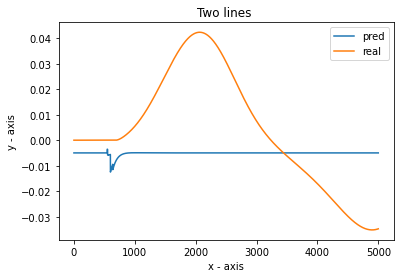

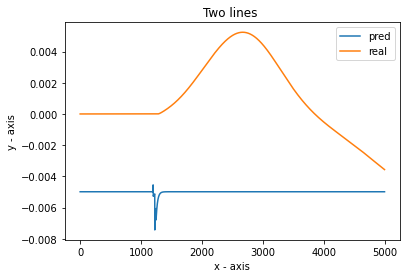

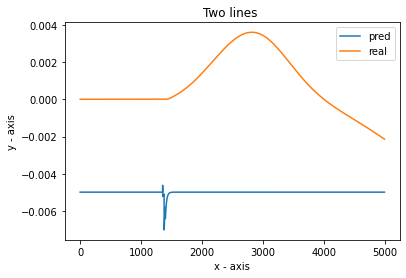

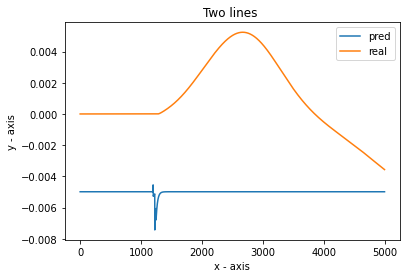

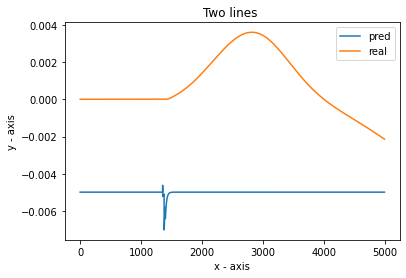

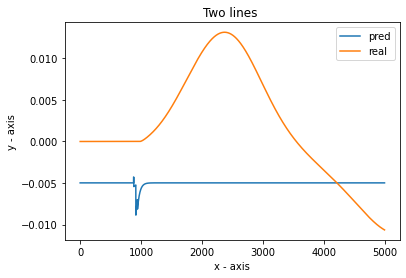

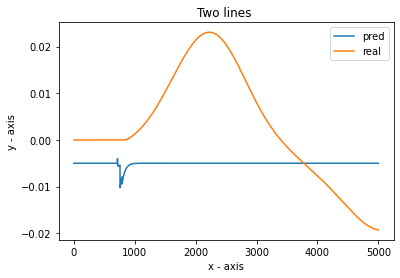

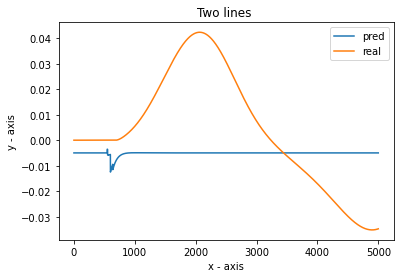

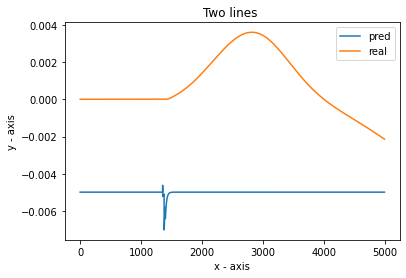

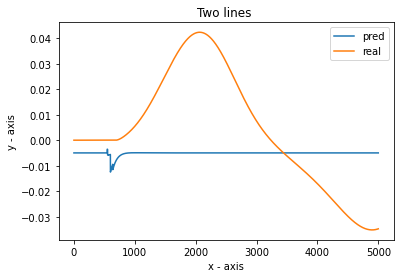

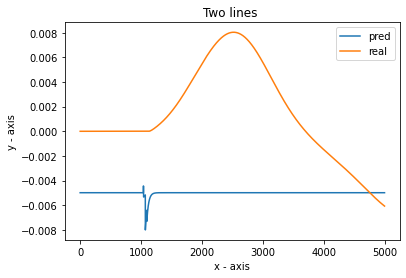

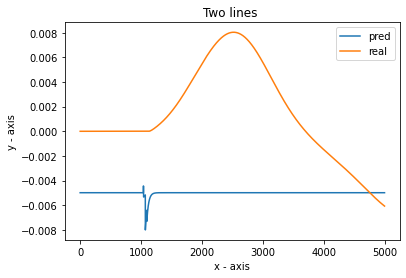

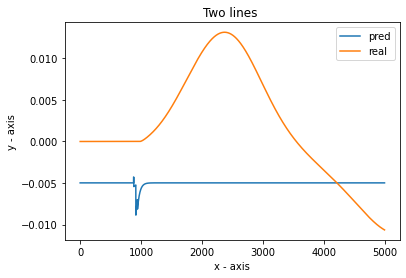

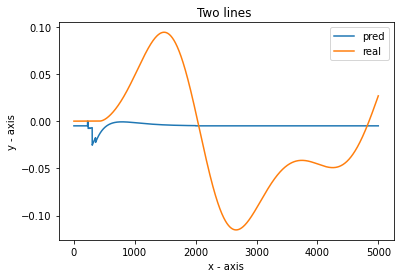

In [12]:
y_pred = y_pred.reshape(-1,1)
y_pred = scaler_X.inverse_transform(y_pred)
y_pred = y_pred.reshape(-1,5001,5)
y_pred1 = y_pred[:,:,0]
y_real1 = y_test[:,:,0]
for i in range(14):
    plt.plot(y_pred1[i], label = "pred")
    plt.plot(y_real1[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

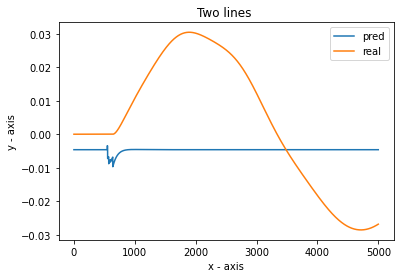

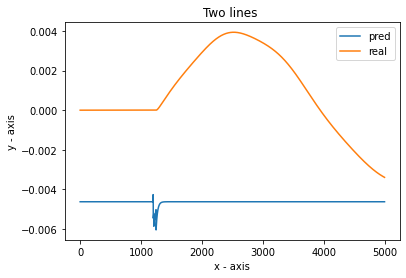

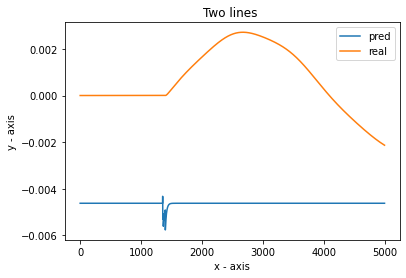

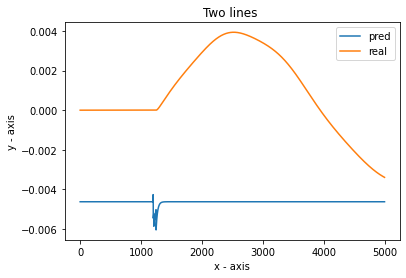

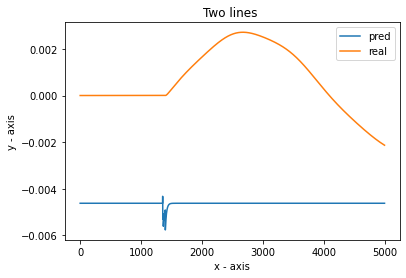

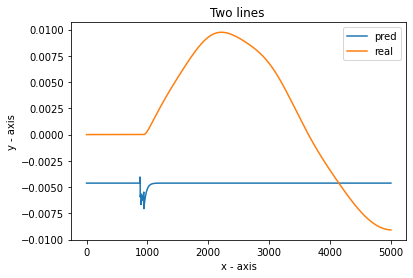

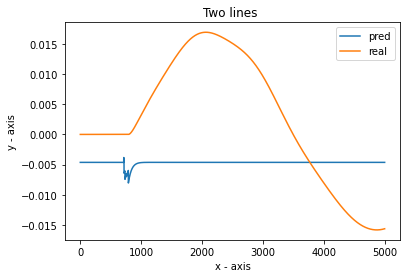

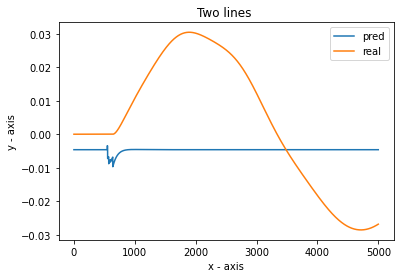

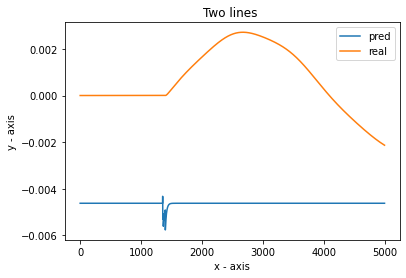

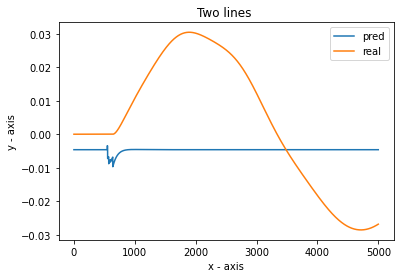

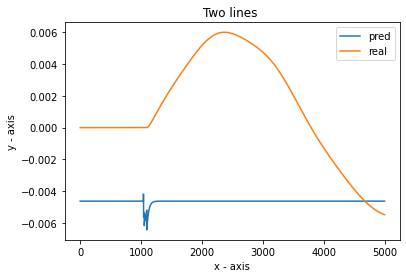

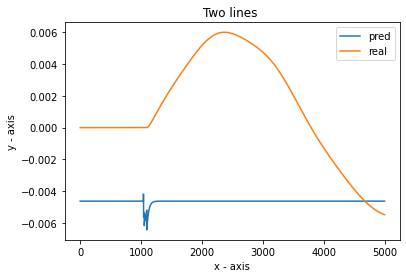

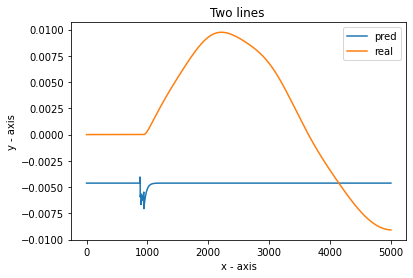

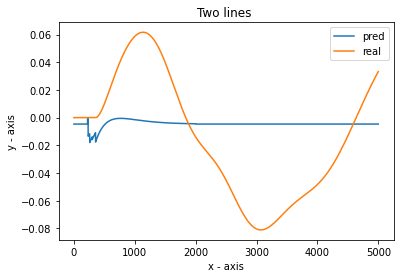

In [13]:
y_pred2 = y_pred[:,:,1]
y_real2 = y_test[:,:,1]
for i in range(14):
    plt.plot(y_pred2[i], label = "pred")
    plt.plot(y_real2[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

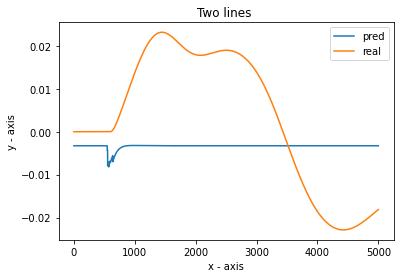

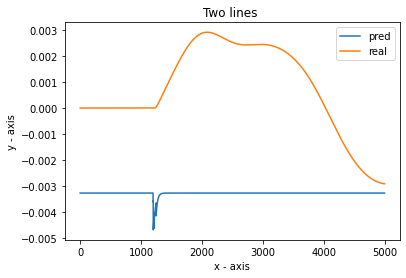

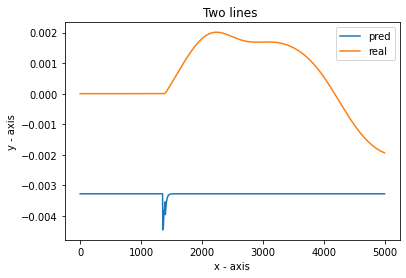

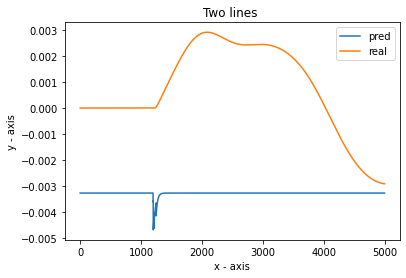

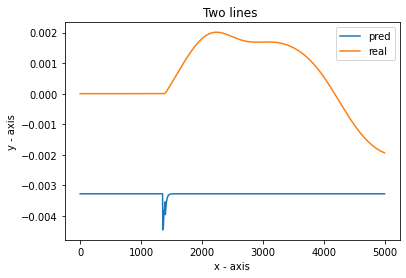

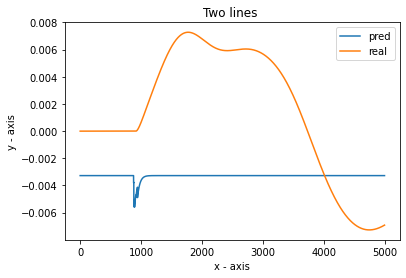

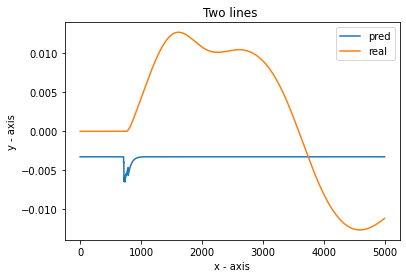

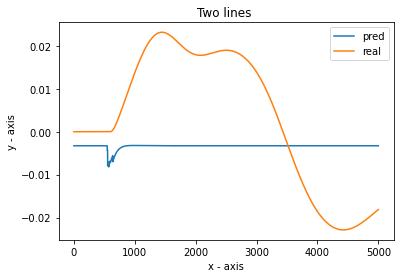

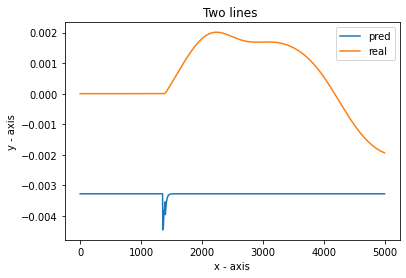

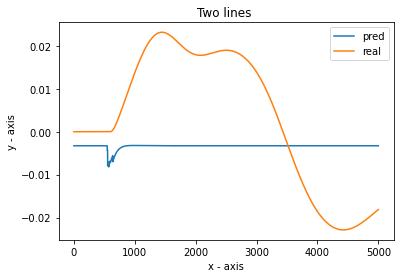

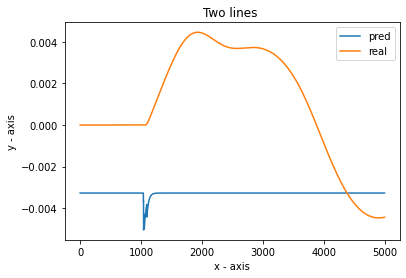

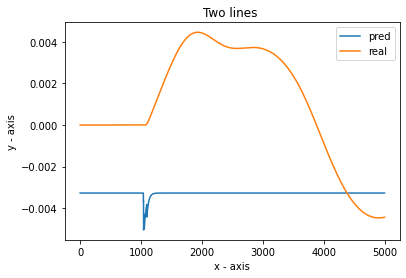

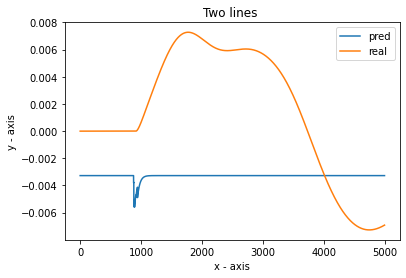

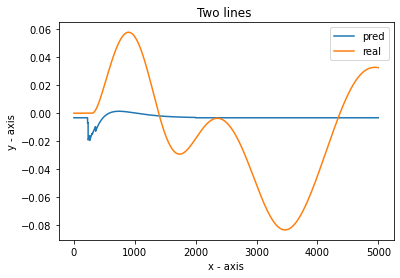

In [14]:
y_pred3 = y_pred[:,:,2]
y_real3 = y_test[:,:,2]
for i in range(14):
    plt.plot(y_pred3[i], label = "pred")
    plt.plot(y_real3[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

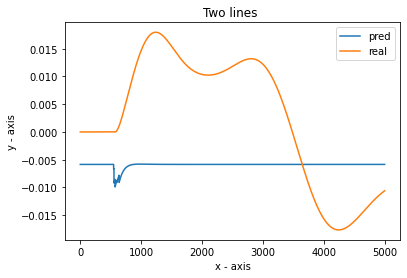

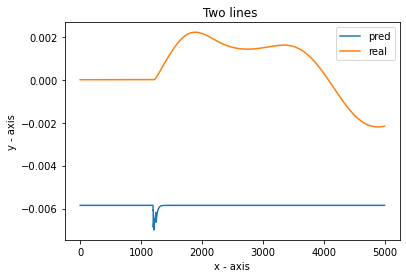

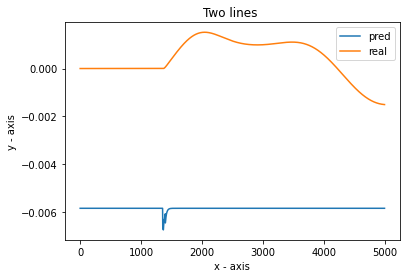

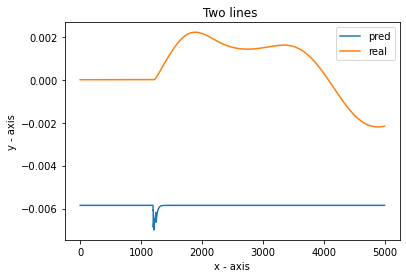

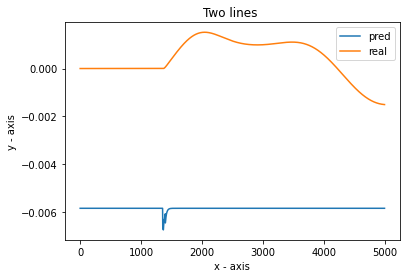

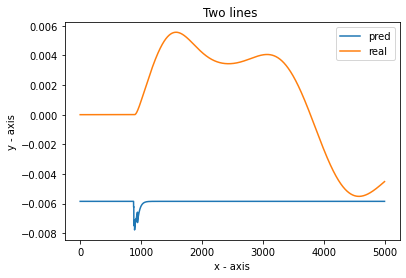

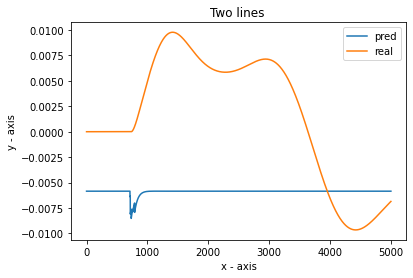

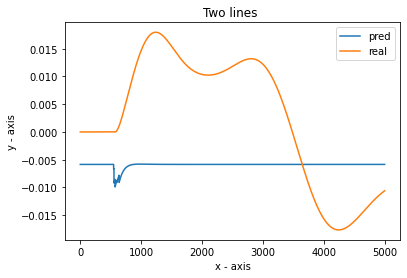

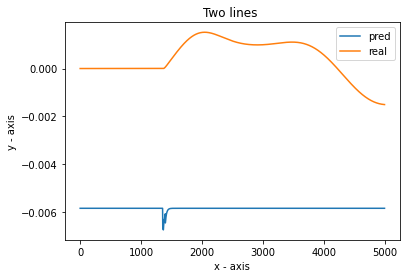

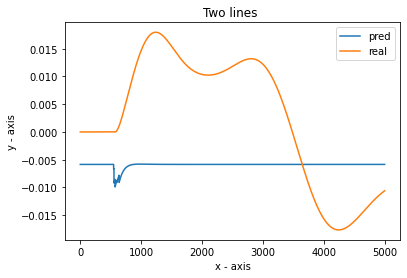

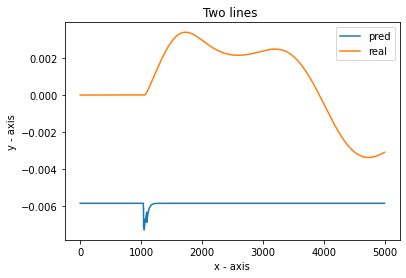

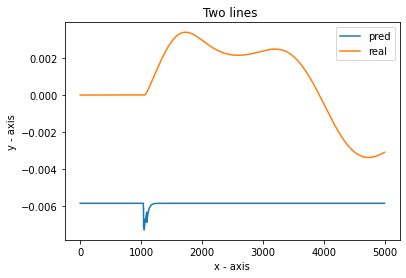

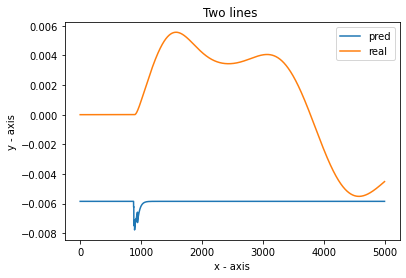

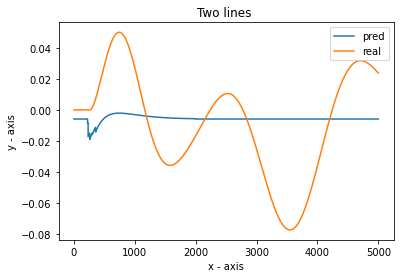

In [15]:
y_pred4 = y_pred[:,:,3]
y_real4 = y_test[:,:,3]
for i in range(14):
    plt.plot(y_pred4[i], label = "pred")
    plt.plot(y_real4[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

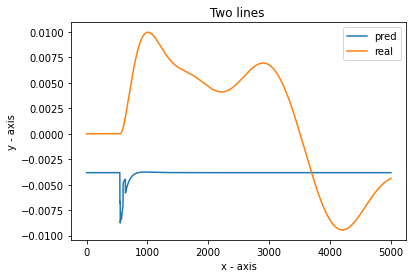

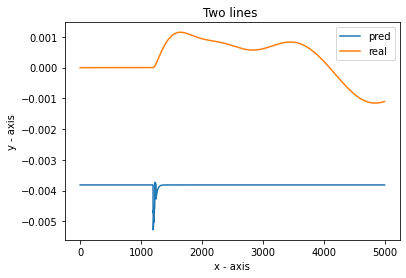

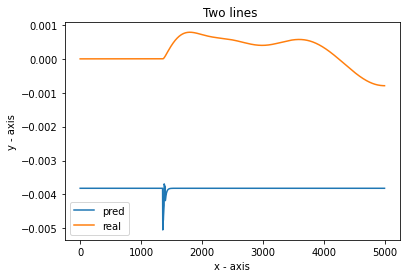

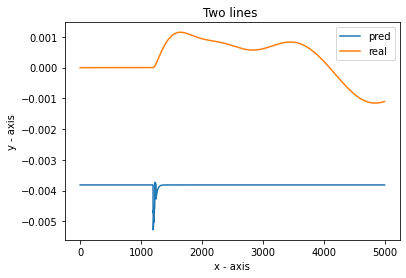

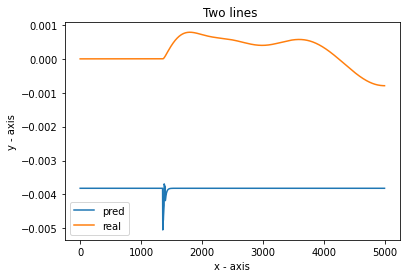

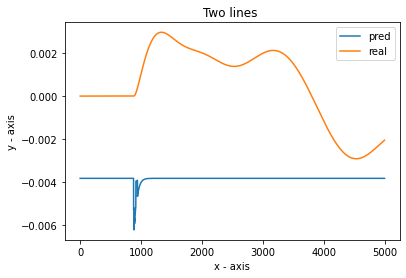

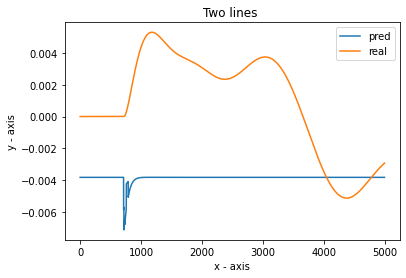

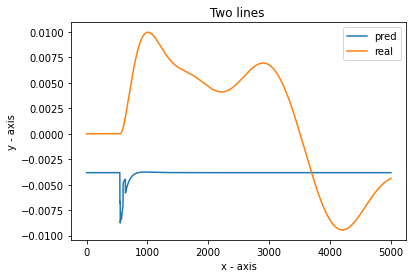

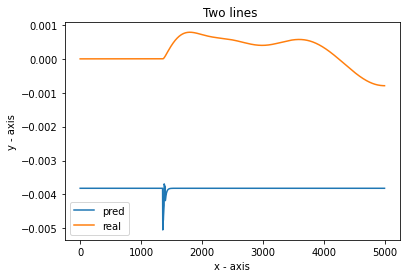

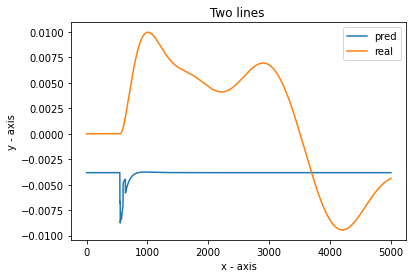

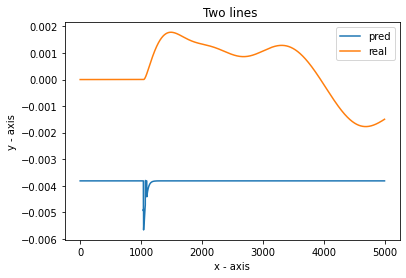

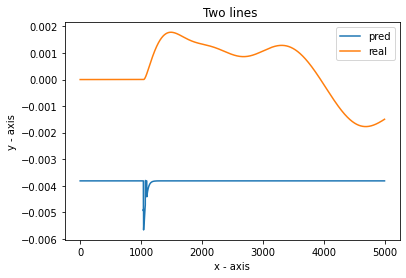

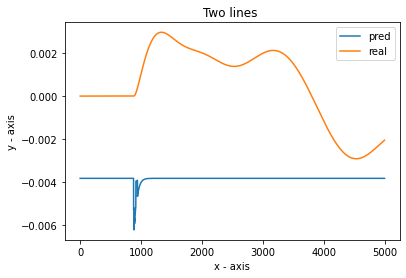

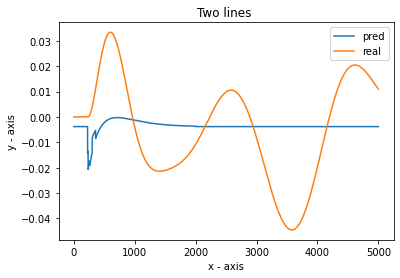

In [16]:
y_pred5 = y_pred[:,:,4]
y_real5 = y_test[:,:,4]
for i in range(14):
    plt.plot(y_pred5[i], label = "pred")
    plt.plot(y_real5[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()